In [1]:
import pandas as pd
import os
import shutil
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
df = pd.read_csv('./shopee-product-matching/train.csv')
df.head()

posting_id                                 image       image_phash  \
0   train_129225211  0000a68812bc7e98c42888dfb1c07da0.jpg  94974f937d4c2433   
1  train_3386243561  00039780dfc94d01db8676fe789ecd05.jpg  af3f9460c2838f0f   
2  train_2288590299  000a190fdd715a2a36faed16e2c65df7.jpg  b94cb00ed3e50f78   
3  train_2406599165  00117e4fc239b1b641ff08340b429633.jpg  8514fc58eafea283   
4  train_3369186413  00136d1cf4edede0203f32f05f660588.jpg  a6f319f924ad708c   

                                               title  label_group  
0                          Paper Bag Victoria Secret    249114794  
1  Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...   2937985045  
2        Maling TTS Canned Pork Luncheon Meat 397 gr   2395904891  
3  Daster Batik Lengan pendek - Motif Acak / Camp...   4093212188  
4                  Nescafe \xc3\x89clair Latte 220ml   3648931069

In [10]:
df['label_group'] = df['label_group'].astype(str)

In [11]:
def copyFile(source: str, destination:str):
    print('Copying', source, 'to', destination)
    os.makedirs(os.path.dirname(destination), exist_ok=True)
    shutil.copy(source, destination)

for index in df.index:
    filename = df['image'][index]
    dir = df['label_group'][index]
    copyFile(f'shopee-product-matching/train_images/{filename}', f'train_images/{dir}/{filename}')

Copying shopee-product-matching/train_images/0000a68812bc7e98c42888dfb1c07da0.jpg to train_images/249114794/0000a68812bc7e98c42888dfb1c07da0.jpg
Copying shopee-product-matching/train_images/00039780dfc94d01db8676fe789ecd05.jpg to train_images/2937985045/00039780dfc94d01db8676fe789ecd05.jpg
Copying shopee-product-matching/train_images/000a190fdd715a2a36faed16e2c65df7.jpg to train_images/2395904891/000a190fdd715a2a36faed16e2c65df7.jpg
Copying shopee-product-matching/train_images/00117e4fc239b1b641ff08340b429633.jpg to train_images/4093212188/00117e4fc239b1b641ff08340b429633.jpg
Copying shopee-product-matching/train_images/00136d1cf4edede0203f32f05f660588.jpg to train_images/3648931069/00136d1cf4edede0203f32f05f660588.jpg
Copying shopee-product-matching/train_images/0013e7355ffc5ff8fb1ccad3e42d92fe.jpg to train_images/2660605217/0013e7355ffc5ff8fb1ccad3e42d92fe.jpg
Copying shopee-product-matching/train_images/00144a49c56599d45354a1c28104c039.jpg to train_images/1835033137/00144a49c56599d4

In [12]:
label_groups = list(df['label_group'].unique())
label_groups

['249114794',
 '2937985045',
 '2395904891',
 '4093212188',
 '3648931069',
 '2660605217',
 '1835033137',
 '1565741687',
 '2359912463',
 '2630990665',
 '2462407944',
 '509010932',
 '4206465630',
 '1932232224',
 '349297863',
 '1574620312',
 '2353399596',
 '3415582503',
 '2098400894',
 '3624674138',
 '531768918',
 '4240123481',
 '2224428568',
 '4044205497',
 '404551210',
 '2034299767',
 '2933791615',
 '532279668',
 '894203507',
 '2464977091',
 '4266903097',
 '3578753118',
 '3912088353',
 '1632207687',
 '2653016647',
 '3328069909',
 '3816307840',
 '983229802',
 '1149464099',
 '98592019',
 '944796571',
 '960169860',
 '1039178864',
 '1990957212',
 '1529085103',
 '3635513698',
 '1264841825',
 '1851836169',
 '1141798720',
 '2831184769',
 '371502910',
 '1370343912',
 '2217827677',
 '2964440663',
 '1356633425',
 '215542278',
 '817306375',
 '1199602251',
 '196929574',
 '3489985175',
 '1561749110',
 '3580263851',
 '1702111919',
 '791476097',
 '2272723710',
 '3798328212',
 '358422381',
 '3810846799'

In [13]:
num_skipped = 0
for folder_name in label_groups:
    folder_path = os.path.join("train_images", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)

print("Deleted %d images" % num_skipped)

Deleted 0 images


In [14]:
image_size = (256, 256)
batch_size = 32

In [15]:


train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "train_images",
    validation_split=0.3,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "train_images",
    validation_split=0.3,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 32460 files belonging to 11014 classes.
Using 22722 files for training.
Found 32460 files belonging to 11014 classes.
Using 9738 files for validation.


In [16]:
class_names = train_ds.class_names

2022-08-11 19:05:06.137977: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


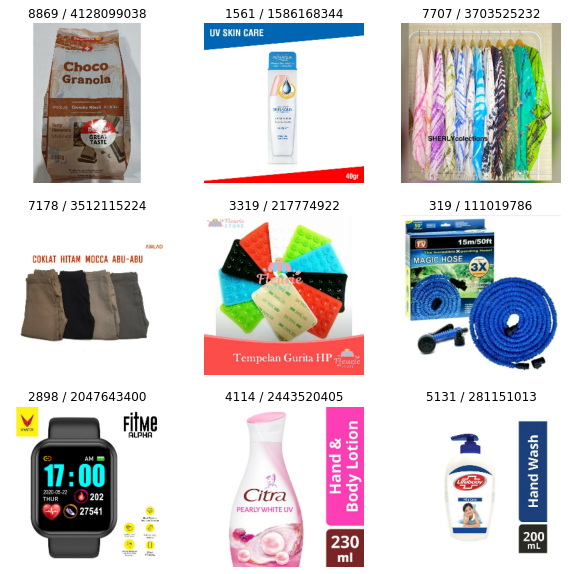

In [8]:
# Visualize the data
plt.figure(figsize=(10, 10))
# for i, (image, label) in enumerate(train_ds.take(9)):
#     print(image.shape)
#     print(label)
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(image.numpy().astype("uint8"))
#     plt.title(int(label))
#     plt.axis("off")
    
for images, labels in train_ds.take(1):
    for i in range(9):
        # print(images[i].shape)
        # print(labels[i])
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        label_index = int(labels[i])
        plt.title(f'{label_index} / {class_names[label_index]}')
        plt.axis("off")

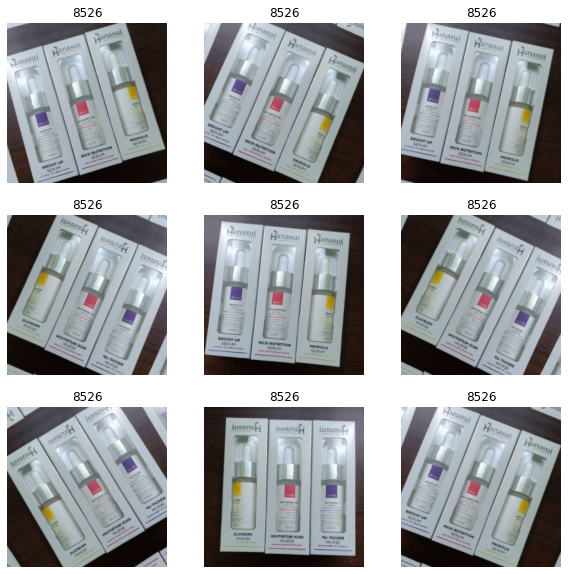

In [13]:
# Using image data augmentation
with tf.device('/cpu:0'):
    data_augmentation = keras.Sequential(
        [
            layers.RandomFlip(mode="horizontal"), layers.RandomRotation(0.1)
        ]
    )

for images, labels in train_ds.take(1):
    plt.figure(figsize=(10, 10))
    first_image = images[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(
            tf.expand_dims(first_image, 0), training=True
        )
        plt.imshow(augmented_image[0].numpy().astype("int32"))
        plt.title(int(labels[0]))
        plt.axis("off")


In [15]:
base_model = keras.applications.Xception(
    weights="imagenet",  # Load weights pre-trained on ImageNet.
    input_shape=(256, 256, 3),
    include_top=False,
)  # Do not include the ImageNet classifier at the top.

# Freeze the base_model
base_model.trainable = False

# Create new model on top
inputs = keras.Input(shape=(256, 256, 3))
x = data_augmentation(inputs)  # Apply random data augmentation

# Pre-trained Xception weights requires that input be scaled
# from (0, 255) to a range of (-1., +1.), the rescaling layer
# outputs: `(inputs * scale) + offset`
scale_layer = keras.layers.Rescaling(scale=1 / 127.5, offset=-1)
x = scale_layer(x)

# The base model contains batchnorm layers. We want to keep them in inference mode
# when we unfreeze the base model for fine-tuning, so we make sure that the
# base_model is running in inference mode here.
x = base_model(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)  # Regularize with dropout
outputs = keras.layers.Dense(11014, activation = "softmax")(x)
model = keras.Model(inputs, outputs)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 sequential_4 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 xception (Functional)       (None, 8, 8, 2048)        20861480  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                           

In [16]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

epochs = 20
model.fit(train_ds, epochs=epochs, validation_data=val_ds)

Epoch 1/20


2022-08-11 19:51:36.491664: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


711/711 [==============================] - ETA: 0s - loss: 9.4394 - sparse_categorical_accuracy: 0.0882

2022-08-11 19:54:45.930868: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


711/711 [==============================] - 239s 329ms/step - loss: 9.4394 - sparse_categorical_accuracy: 0.0882 - val_loss: 6.9272 - val_sparse_categorical_accuracy: 0.2213
Epoch 2/20
711/711 [==============================] - 231s 325ms/step - loss: 3.3537 - sparse_categorical_accuracy: 0.4144 - val_loss: 6.1119 - val_sparse_categorical_accuracy: 0.3114
Epoch 3/20
711/711 [==============================] - 231s 325ms/step - loss: 1.5679 - sparse_categorical_accuracy: 0.6533 - val_loss: 5.8466 - val_sparse_categorical_accuracy: 0.3795
Epoch 4/20
711/711 [==============================] - 225s 316ms/step - loss: 0.8514 - sparse_categorical_accuracy: 0.7963 - val_loss: 5.7806 - val_sparse_categorical_accuracy: 0.4056
Epoch 5/20
711/711 [==============================] - 227s 319ms/step - loss: 0.5267 - sparse_categorical_accuracy: 0.8716 - val_loss: 5.8129 - val_sparse_categorical_accuracy: 0.4234
Epoch 6/20
711/711 [==============================] - 227s 319ms/step - loss: 0.3800 - spar

In [17]:
# Unfreeze the base_model. Note that it keeps running in inference mode
# since we passed `training=False` when calling it. This means that
# the batchnorm layers will not update their batch statistics.
# This prevents the batchnorm layers from undoing all the training
# we've done so far.
base_model.trainable = True
model.summary()

model.compile(
    optimizer=keras.optimizers.Adam(1e-5),  # Low learning rate
     loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

epochs = 10
model.fit(train_ds, epochs=epochs, validation_data=val_ds)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 sequential_4 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 xception (Functional)       (None, 8, 8, 2048)        20861480  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                           

2022-08-11 21:13:12.505985: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


711/711 [==============================] - ETA: 0s - loss: 0.0546 - sparse_categorical_accuracy: 0.9860

2022-08-11 21:22:03.834010: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


711/711 [==============================] - 586s 816ms/step - loss: 0.0546 - sparse_categorical_accuracy: 0.9860 - val_loss: 5.8979 - val_sparse_categorical_accuracy: 0.4823
Epoch 2/10
711/711 [==============================] - 547s 770ms/step - loss: 0.0418 - sparse_categorical_accuracy: 0.9886 - val_loss: 5.6747 - val_sparse_categorical_accuracy: 0.4864
Epoch 3/10
711/711 [==============================] - 603s 848ms/step - loss: 0.0328 - sparse_categorical_accuracy: 0.9898 - val_loss: 6.2442 - val_sparse_categorical_accuracy: 0.4862
Epoch 4/10
711/711 [==============================] - 558s 785ms/step - loss: 0.0331 - sparse_categorical_accuracy: 0.9904 - val_loss: 5.8798 - val_sparse_categorical_accuracy: 0.4825
Epoch 5/10
711/711 [==============================] - 573s 805ms/step - loss: 0.0325 - sparse_categorical_accuracy: 0.9908 - val_loss: 5.9100 - val_sparse_categorical_accuracy: 0.4837
Epoch 6/10
711/711 [==============================] - 606s 853ms/step - loss: 0.0287 - spar

In [18]:
model.save('models/11-08_0,4885')

INFO:tensorflow:Assets written to: models/11-08_0,4885/assets


INFO:tensorflow:Assets written to: models/11-08_0,4885/assets


In [2]:
model = keras.models.load_model('models/11-08_0,4885')

Metal device set to: Apple M1 Max

systemMemory: 64.00 GB
maxCacheSize: 24.00 GB



2022-08-14 12:14:33.912441: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-14 12:14:33.912810: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [18]:
test_datagen= ImageDataGenerator()
test_df = pd.read_csv('shopee-product-matching/test.csv')
test_images = test_datagen.flow_from_dataframe(
    dataframe = test_df, 
    x_col='image', 
    directory='shopee-product-matching/test_images/', 
    target_size=image_size, 
    class_mode=None
)

# img = keras.preprocessing.image.load_img(
#     "shopee-product-matching/test_images/0008377d3662e83ef44e1881af38b879.jpg", target_size=image_size
# )
# img_array = keras.preprocessing.image.img_to_array(img)
# img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(test_images)

Found 3 validated image filenames.


2022-08-13 13:14:27.905820: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 524ms/step


In [6]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "shopee-product-matching/val_images",
    # validation_split=0.3,
    # subset="training",
    seed=1337,
    image_size=(256,256),
    batch_size=32,
    label_mode = None
)

Found 3 files belonging to 1 classes.


In [8]:
predictions = model.predict(val_ds)

1/1 [==============================] - 0s 28ms/step


In [20]:
data = []
for pred in predictions:
    image_result = {}
    max_prob_index = np.argmax(pred)
    image_result['predicted_label_group'] = class_names[max_prob_index]
    image_result['probability'] = pred[max_prob_index]
    data.append(image_result)
    matching_rows = df.loc[df['label_group'] == image_result['predicted_label_group']]
    image_result['matches'] = matching_rows['posting_id'].str.cat(sep=' ')
    image_result['matching_images'] = matching_rows['image'].str.cat(sep=' ')
    

In [21]:
data

[{'predicted_label_group': '3155491468',
  'probability': 0.5839129,
  'matches': 'train_3296048151 train_1176556747 train_549832589 train_498840783 train_1566232216 train_1606743060 train_198065144 train_912736414 train_941904187',
  'matching_images': '54d370119e3b312b9b26c0a2a8858d4d.jpg 61cd4411b3c31235fb12a32369cbac68.jpg 70dddbe4417523d18d4830e07f7e2216.jpg a2411316f235af0215a93b9e402cd41c.jpg ab6955a7deaa5bcaeda638c78c4242c8.jpg bfa3accb50c95a8dab1f076d8c2cc406.jpg d14cc3e0e5f6d7abcc25aaecee1c679c.jpg e01fed8b03ad127895db18ebd13233ce.jpg f3cdc583eac5e4c135b2719759097ef3.jpg'},
 {'predicted_label_group': '1128407589',
  'probability': 0.67376167,
  'matches': 'train_4221325765 train_2255419956',
  'matching_images': '039b7194bfc5be44d0e7b4c092ff5961.jpg d7506c79bf089c733a372152be06193d.jpg'},
 {'predicted_label_group': '4062076338',
  'probability': 0.7820702,
  'matches': 'train_438033632 train_4090578972 train_2029644866 train_1743372719',
  'matching_images': '014ff09619ff5cfb

In [22]:
results_df = pd.DataFrame(data)

In [23]:
results_df

predicted_label_group  probability  \
0            3155491468     0.583913   
1            1128407589     0.673762   
2            4062076338     0.782070   

                                             matches  \
0  train_3296048151 train_1176556747 train_549832...   
1                  train_4221325765 train_2255419956   
2  train_438033632 train_4090578972 train_2029644...   

                                     matching_images  
0  54d370119e3b312b9b26c0a2a8858d4d.jpg 61cd4411b...  
1  039b7194bfc5be44d0e7b4c092ff5961.jpg d7506c79b...  
2  014ff09619ff5cfb2c3c5c950e31ea7a.jpg b19a335c1...

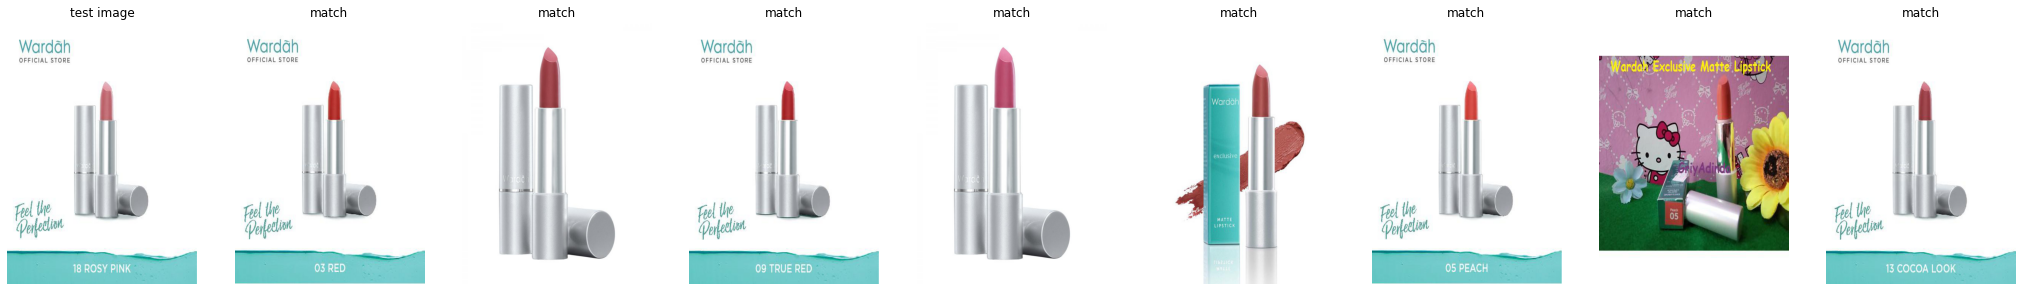

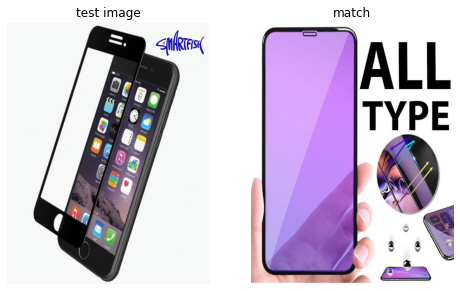

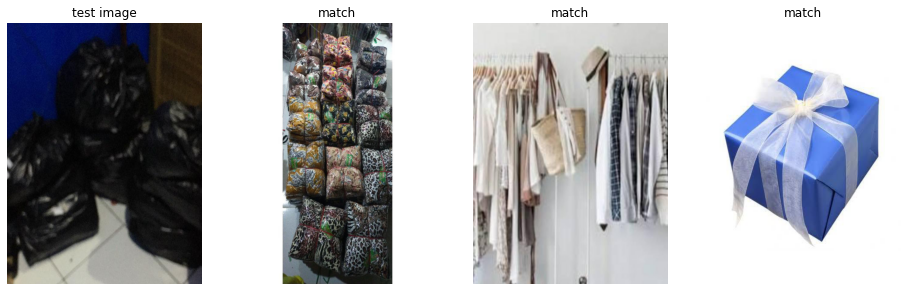

In [24]:
for index, row in results_df.iterrows():
    # test_image = f"shopee-product-matching/test_images/{row['image']}"
    matching_images = list(map(lambda image: f"shopee-product-matching/train_images/{image}", row['matching_images'].split()))
    images = matching_images
    number_of_images = len(images)
    fig = plt.figure(figsize=(4*number_of_images,4.8))
    for i in range(number_of_images):
        ax = fig.add_subplot(1, number_of_images, i+1)
        img = imread(images[i])
        plt.imshow(img, aspect='auto')
        plt.title('test image' if i == 0 else 'match')
        plt.axis('off')

In [ ]:
test_datagen= ImageDataGenerator()
test_df = pd.read_csv('shopee-product-matching/test.csv')
test_images = test_datagen.flow_from_dataframe(
    dataframe = test_df, 
    x_col='image', 
    directory='shopee-product-matching/test_images/', 
    target_size=image_size, 
    class_mode=None
)

In [19]:
predictions

array([[4.5184158e-11, 7.1629543e-11, 1.2658867e-08, ..., 1.3359971e-11,
        3.0852650e-11, 4.8747012e-07],
       [8.1922847e-13, 2.6029065e-14, 2.8658272e-12, ..., 1.4381099e-12,
        2.5204498e-11, 2.8613863e-11],
       [6.1214029e-12, 1.7757533e-09, 3.0348729e-10, ..., 7.8145712e-11,
        8.5555364e-13, 2.2327624e-10]], dtype=float32)

In [57]:
data = []
for pred in predictions:
    image_result = {} 
    max_prob_index = np.argmax(pred)
    image_result['predicted_label_group'] = class_names[max_prob_index]
    image_result['probability'] = pred[max_prob_index]
    matching_rows = df.loc[df['label_group'] == image_result['predicted_label_group']]
    image_result['matches'] = matching_rows['posting_id'].str.cat(sep=' ')
    image_result['matching_images'] = matching_rows['image'].str.cat(sep=' ')
    data.append(image_result)


results_df = pd.concat([test_df,pd.DataFrame(data)], axis = 1)
results_df

posting_id                                 image       image_phash  \
0  test_2255846744  0006c8e5462ae52167402bac1c2e916e.jpg  ecc292392dc7687a   
1  test_3588702337  0007585c4d0f932859339129f709bfdc.jpg  e9968f60d2699e2c   
2  test_4015706929  0008377d3662e83ef44e1881af38b879.jpg  ba81c17e3581cabe   

                                               title predicted_label_group  \
0  Edufuntoys - CHARACTER PHONE ada lampu dan mus...            4026078435   
1  (Beli 1 Free Spatula) Masker Komedo | Blackhea...             116488907   
2   READY Lemonilo Mie instant sehat kuah dan goreng            1537696988   

   probability                                            matches  \
0     0.218687                  train_3107721474 train_2829311242   
1     0.590405                  train_1407134436 train_3897388237   
2     0.795170  train_3238336617 train_33320904 train_32582560...   

                                     matching_images  
0  2a6147e04d89529899e53fa6046acfd2.jpg 2d437c231...  
1  3561667f6e864a68e574624a18d341cb.jpg 69c395aa1...  
2  33291f0cc48a5b7e127a614df7dd664a.jpg 356b48432...

In [42]:
results_df = results_df.reset_index()  # make sure indexes pair with number of rows


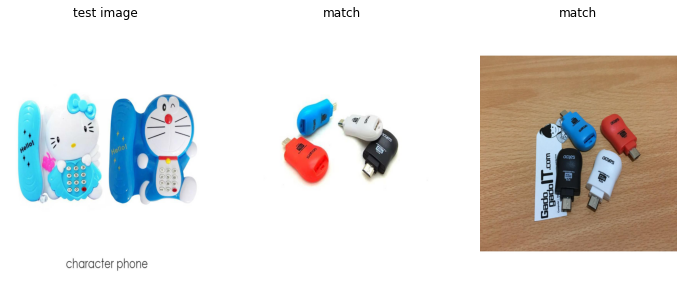

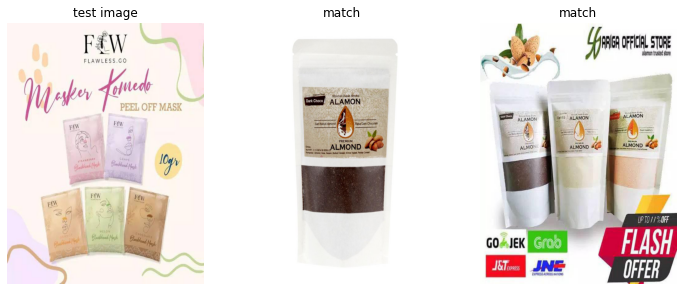

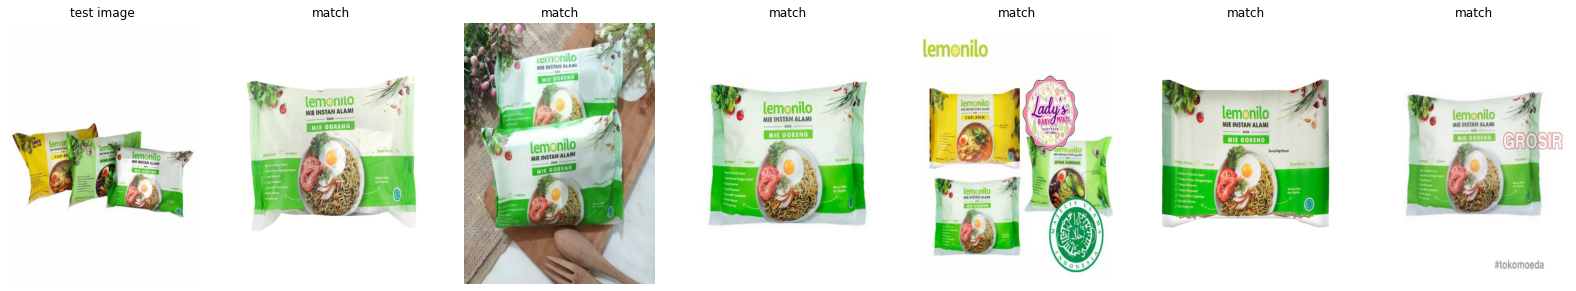

In [56]:
for index, row in results_df.iterrows():
    test_image = f"shopee-product-matching/test_images/{row['image']}"
    matching_images = list(map(lambda image: f"shopee-product-matching/train_images/{image}", row['matching_images'].split()))
    images = [test_image] + matching_images
    number_of_images = len(images)
    fig = plt.figure(figsize=(4*number_of_images,4.8))
    for i in range(number_of_images):
        ax = fig.add_subplot(1, number_of_images, i+1)
        img = imread(images[i])
        plt.imshow(img, aspect='auto')
        plt.title('test image' if i == 0 else 'match')
        plt.axis('off')

In [60]:
submission = results_df[['posting_id','matches']]
submission

posting_id                                            matches
0  test_2255846744                  train_3107721474 train_2829311242
1  test_3588702337                  train_1407134436 train_3897388237
2  test_4015706929  train_3238336617 train_33320904 train_32582560...